# Preprocesamiento

Utilizaremos un dataset que pertenece a una empresa de automóviles que tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5)

Después de una intensa investigación de mercado, han deducido que el comportamiento del nuevo mercado es similar al mercado existente.
En su mercado existente, el equipo de ventas ha clasificado a todos los clientes en cuatro segmentos (A, B, C y D)

https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation/code

Kaggle es una plataforma donde se pueden encontrar varios notebooks y datasets con ejemplos de machine learning, una muy buena biblioteca de google, usa el mismo engine de collab

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('archive/Train.csv')

In [3]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Se deben recorrer las técnicas de preprocesamiento de los datos, antes de entrenar nuestros modelos de inteligencia artificial

Tenemos que buscar alguna forma de convertir todos los datos que podemos tener en números, para comenzar el entrenamiento del modelo.

In [4]:
# 1) Encontrar los valores nulos  
df.isnull()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8063,False,False,False,False,False,True,False,False,False,False,False
8064,False,False,False,False,False,False,False,False,False,False,False
8065,False,False,False,False,False,False,False,False,False,False,False
8066,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#2) Contar los valores nulos que se encuentran en cada campo 
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
# 3) Qué hacer con éstos nulos?, depende del caso de negocio y del conocimiento de la tabla 

# Para éste ejemplo eliminaremos los registros con muchos datos nulos

df.dropna(inplace=True)  

In [7]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [8]:
# Ahora sí iniciamos el preprocesamiento con la característica Gender, lo que haremos será revisar si son los únicos valores,
# es decir, encontrar los datos que identifican de manera única a los registros, como en éste caso y para este ejemplo: 
# masculino y femenino 

gender_unique = pd.unique(df['Gender'])
gender_unique

array(['Male', 'Female'], dtype=object)

In [9]:
# Female = 0
# Male = 1

def convertir_Gender(gender):
    if gender == 'Male':
        return 1
    return 0    


In [10]:
print(convertir_Gender('Male'), convertir_Gender('Female'))

1 0


In [11]:
# map es un foreach que nos permite realizar procesos a cada elemento en el arreglo al que se le aplique.
# En este caso se le pasa el nombre de la fución y dicha función recibirá como parámetros los datos en la comlumna gender del dataframe
 
df['Gender'] = df['Gender'].map(convertir_Gender)

In [12]:
# Vemos que la función hizo su trabajo y se categorizó la columna Gender a ceros y unos 
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,1,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,1,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [13]:
# La anterior es una forma de codificación para los strings que tengamos para identificar categorías.

# Cuando queremos convertir texto a números, como oraciones en un chat, que no son categorías sino información más compuesta
# se utiliza modelos de inteligencia artificial, como modelos de procesamiento de lenguaje natural. que se encargan de generar un 
# vector para la cantidad de strings que uno le brinda.

# Esta misma codificación deberá realizarse para cada uno de los datos que signifiquen categorías y que se encuentren como strings en 
# el dataframe.

# Tenemos ya algunas funciónes de la librería sklearn que nos permiten hacer esas codificaciónes según se requiera para esos datos.


from sklearn.preprocessing import OrdinalEncoder

In [14]:
columns = ['Ever_Married', "Graduated", "Profession", "Spending_Score", "Var_1"]
enc = OrdinalEncoder()
enc.fit(df[columns]) # Entrenaremos el encoder con los campos Ever_married, Graduated, Profession, Spending_Score, Var_1, son string y pertenecen o identifican categorías 

OrdinalEncoder()

In [15]:
df_encoder = enc.transform(df[columns])
df_encoder # Aquí tenemos todos los datos ya codificados 

array([[0., 0., 5., 2., 3.],
       [1., 1., 2., 2., 5.],
       [1., 1., 7., 1., 5.],
       ...,
       [0., 1., 5., 2., 5.],
       [0., 1., 5., 2., 5.],
       [1., 1., 4., 0., 3.]])

In [16]:
# Para revisar que se utilizaron las características que se querían en el encoder podemos revisar el modelo

enc.feature_names_in_ 

array(['Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'], dtype=object)

In [17]:
# Para revisar las categrías que fueron codificadas de cada característica 

enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object),
 array(['Average', 'High', 'Low'], dtype=object),
 array(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],
       dtype=object)]

In [18]:
# Para verlo de manera más ordenada 

for (index, name) in enumerate(enc.feature_names_in_):
    print(name)
    print(enc.categories_[index])
    print("--")

Ever_Married
['No' 'Yes']
--
Graduated
['No' 'Yes']
--
Profession
['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing']
--
Spending_Score
['Average' 'High' 'Low']
--
Var_1
['Cat_1' 'Cat_2' 'Cat_3' 'Cat_4' 'Cat_5' 'Cat_6' 'Cat_7']
--


In [19]:
# Para revertir la codificación para un ejemplo específico, es decir, extraer datos de cada arreglo 

enc.inverse_transform([[0, 1, 1, 2, 6]])

array([['No', 'Yes', 'Doctor', 'Low', 'Cat_7']], dtype=object)

In [20]:
# Ya contamos con las categprias codificadas en el dataframe df_encoder, falta ahora sustituír los datos codificados en el dataframe 
# del ejercicio df, para las columnas que se trabajaron columns = ['Ever_Married', "Graduated", "Profession", "Spending_Score", "Var_1"]

for(index, column) in enumerate(columns):
    df[column] = df_encoder[:, index] # se sustituirá, todas las filas para la columna especificada

df.head()



,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,5.0,1.0,2.0,4.0,3.0,D
2,466315,0,1.0,67,1.0,2.0,1.0,2.0,1.0,5.0,B
3,461735,1,1.0,67,1.0,7.0,0.0,1.0,2.0,5.0,B
5,461319,1,1.0,56,0.0,0.0,0.0,0.0,2.0,5.0,C
6,460156,1,0.0,32,1.0,5.0,1.0,2.0,3.0,5.0,C


In [21]:
# Como podemos ver, no codificamos los datos de Segmentation, se trata de nuestra variable objetivo, nuestro target.

# Como ya solo se trata de una columna y una fila (un solo array de contenidos), no se usa el Ordinal Encoder, ya que está diseñado para 
# trabajar con múltiples características al mismo tiempo (array de arrays o multidimensión)

# Para trabajar un array simple, se usa el Label Encoder en lugar del Ordinal y es comunmente usado para codificar la variable objetivo
# por eso el nombre de Label 

from sklearn.preprocessing import LabelEncoder



In [22]:
le = LabelEncoder()

# En este caso no habrá un entrenamiento como con el Ordinal Encoder, ya que se cuenta con una función 
y = le.fit_transform(df['Segmentation']) 

In [23]:
y

array([3, 1, 1, ..., 3, 1, 1])

In [24]:
# Para ver las clases que conforman a nuestra variable objetivo (categorías pero de la variable objetivo)
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [25]:
# Obteniendo solo las columnas que conformarán a los datos input (X)
columns = list(df.columns)
columns.remove('ID')
columns.remove('Segmentation')
columns

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1']

In [26]:
# Usamos los datos del dataframe solo de las columnas seleccionadas
X = df[columns]

In [27]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0.0,22,0.0,5.0,1.0,2.0,4.0,3.0
2,0,1.0,67,1.0,2.0,1.0,2.0,1.0,5.0
3,1,1.0,67,1.0,7.0,0.0,1.0,2.0,5.0
5,1,1.0,56,0.0,0.0,0.0,0.0,2.0,5.0
6,1,0.0,32,1.0,5.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...
8062,1,1.0,41,1.0,0.0,0.0,1.0,5.0,5.0
8064,1,0.0,35,0.0,4.0,3.0,2.0,4.0,3.0
8065,0,0.0,33,1.0,5.0,1.0,2.0,1.0,5.0
8066,0,0.0,27,1.0,5.0,1.0,2.0,4.0,5.0


# Normalización o estandarización

In [28]:
import matplotlib.pyplot as plt

In [29]:
# Creamos un histograma que grafica la frecuencia que se repiten valores de las variables, en forma de barras

def mostrar_distribucion(df):
    plt.figure()
    for column in df.columns:
        plt.hist(df[column], alpha= 0.5, label=column) # Al histograma se le pasan las columnas completas una a una
    plt.legend()
    plt.show()


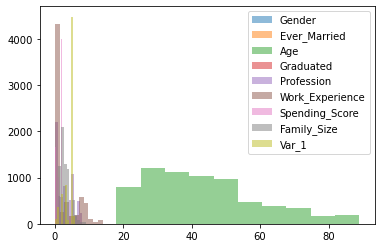

In [30]:
mostrar_distribucion(X)
# Como se puede notar en la gráfica, los valores numéricos para cada caracteristica tienen rangos muy distintos,
# por ejemplo la edad, que va de 19 a 85, mientras que todas las demás caracteristicas se encuentran graficadas
# entre 0 y 20 con rangos menoreso valores puntuales, viendo así muchos colores revueltos


In [31]:
# Si bien podemos usar estos datos para entrenar algoritmos de machine learning bien, para la visualización no nos servirá tanto.

# Para esto tendremos que hacer la estandarización de los datos, básicamente escalar los datos para que todos se encuentren en un rango similar

# Se puede realizar una normalización de varios tipos, como una distribución estándar que me permitirá hacer una curva de Gauss a la gráfica
# la idea es que se mantienen los mismos valores pero con una distribución distinta.

from sklearn.preprocessing import StandardScaler # lo más usado para machine learning

In [32]:
scaler = StandardScaler()

X = scaler.fit_transform(X) # Fit = entrena, fit_transform = entrena y transforma, la transformación resulta en un numpy array

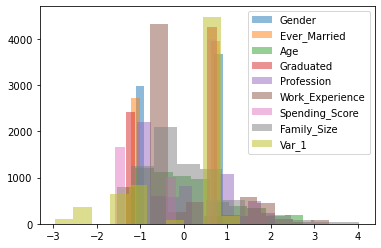

In [33]:
X = pd.DataFrame(X, columns=columns) # Convertimos el numpy array a un DataFrame
mostrar_distribucion(X) 

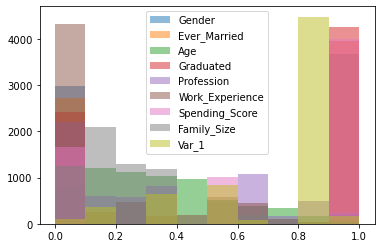

In [34]:
# Este tipo de estandarización también es interezante al momento de entrenar algoritmos de machine learning pues 
# es computacionalmete más rápido trabajar con valores pequeños (-3,4) que grandes, como la edad (19,85)

# Hay otros tipos de estandarización, por ejemplo para hacer un rango mínimo (MinMaxScaler), cambia los rangos y escalarlos para no perder significado
# El rango entre cero y uno es muy usado para tratamiento de imágenes en Deep Learning

# Usamos los datos del dataframe solo de las columnas seleccionadas
X = df[columns]

from sklearn.preprocessing import MinMaxScaler # lo más usado para imágenes con deep learning

scaler = MinMaxScaler()

X = scaler.fit_transform(X) # Fit = entrena, fit_transform = entrena y transforma, la transformación resulta en un numpy array

X = pd.DataFrame(X, columns=columns) # Convertimos el numpy array a un DataFrame
mostrar_distribucion(X) 